Index ‡πÄ‡∏õ‡πá‡∏ô unique ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà: True


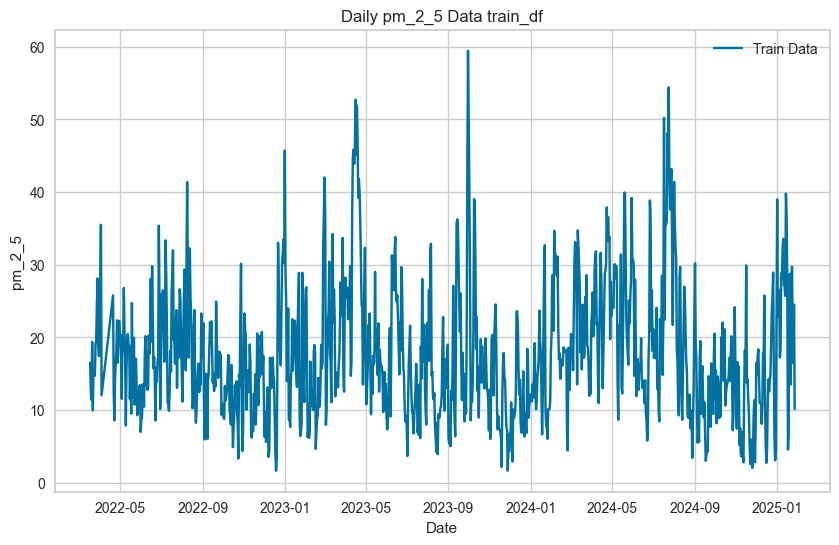

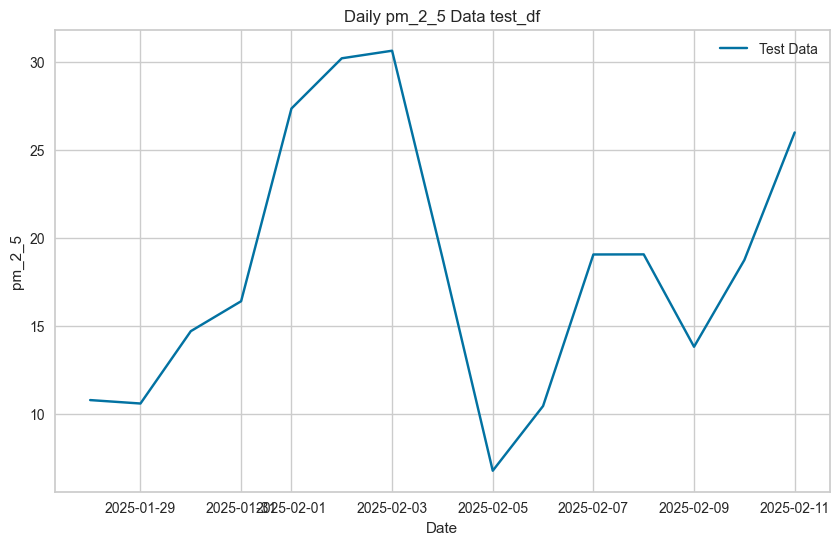

üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏≠‡∏¢‡∏π‡πà‡∏à‡∏£‡∏¥‡∏á‡πÉ‡∏ô train_df: Index(['pm_2_5', 'temperature', 'humidity', 'pm_2_5_sp', 'day', 'month',
       'year', 'season_rainy', 'season_summer', 'season_winter', 'monsoon_sw',
       'monsoon_ne', 'transition_period', 'indonesia_fire', 'calm_wind_period',
       'school_term', 'university_term', 'wind_level',
       'agriculture_production', 'automotive_production',
       'consumer_goods_production', 'freight_transport', 'energy_production',
       'is_holiday'],
      dtype='object')
üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏≠‡∏¢‡∏π‡πà‡∏à‡∏£‡∏¥‡∏á‡πÉ‡∏ô test_df: Index(['pm_2_5', 'temperature', 'humidity', 'pm_2_5_sp', 'day', 'month',
       'year', 'season_rainy', 'season_summer', 'season_winter', 'monsoon_sw',
       'monsoon_ne', 'transition_period', 'indonesia_fire', 'calm_wind_period',
       'school_term', 'university_term', 'wind_level',
       'agriculture_production', 'automot

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1035, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

Initiated  . . . . . . . . . . . . . . . . . .         13:17:27
Status     . . . . . . . . . . . . . . . . . .  Fitting 3 Folds
Estimator  . . . . . . . . . . . . . . . . . .            ARIMA

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from pycaret.time_series import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.utils.time_series import clean_time_index
import holidays
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡πÑ‡∏ü‡∏•‡πå CSV
df = pd.read_csv("daily_csv/export-jsps014-1d.csv", parse_dates=["timestamp"], index_col="timestamp")
df = df.drop(columns=["Unnamed: 0"], errors='ignore')
print("Index ‡πÄ‡∏õ‡πá‡∏ô unique ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà:", df.index.is_unique)

df = df[:]
# ‡∏•‡∏ö index ‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏Å‡∏±‡∏ô‡πÅ‡∏•‡∏∞‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô
df = df[~df.index.duplicated(keep="last")]
df = df.interpolate(method='spline', order=2)
df = df.asfreq("D")

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÄ‡∏Å‡∏ì‡∏ë‡πå‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤ pm_2_5
df = df[(df['pm_2_5'] >= 0) & (df['pm_2_5'] <= 100)]
df = df[(df['pm_2_5_sp'] >= 0) & (df['pm_2_5'] <= 130)]

# ‡πÉ‡∏ä‡πâ‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£
df = df[['pm_2_5','temperature','humidity','pm_2_5_sp']]  # ‡πÉ‡∏ä‡πâ‡πÅ‡∏Ñ‡πà pm_2_5 ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢
df = clean_time_index(data=df, freq="D")

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå ‡∏ß‡∏±‡∏ô, ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô, ‡∏õ‡∏µ
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•" ‡∏Ç‡∏≠‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®‡πÑ‡∏ó‡∏¢
def get_thai_season(month):
    if month in [3, 4, 5]:
        return 'summer'
    elif month in [6, 7, 8, 9, 10]:
        return 'rainy'
    else:
        return 'winter'

df['season'] = df['month'].apply(get_thai_season)

# One-hot encoding ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•
df = pd.get_dummies(df, columns=['season'], prefix='season')

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏•‡∏°‡∏°‡∏£‡∏™‡∏∏‡∏°
def get_monsoon_features(month):
    if month in [6, 7, 8, 9, 10]:  # ‡∏§‡∏î‡∏π‡∏ù‡∏ô (‡∏•‡∏°‡∏°‡∏£‡∏™‡∏∏‡∏°‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏ï‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÉ‡∏ï‡πâ)
        return 1, 0, 0
    elif month in [11, 12, 1, 2]:  # ‡∏§‡∏î‡∏π‡∏´‡∏ô‡∏≤‡∏ß (‡∏•‡∏°‡∏°‡∏£‡∏™‡∏∏‡∏°‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏≠‡∏≠‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÄ‡∏´‡∏ô‡∏∑‡∏≠)
        return 0, 1, 0
    else:  # ‡∏ä‡πà‡∏ß‡∏á‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ú‡πà‡∏≤‡∏ô (‡πÄ‡∏°‡∏©‡∏≤‡∏¢‡∏ô-‡∏û‡∏§‡∏©‡∏†‡∏≤‡∏Ñ‡∏°)
        return 0, 0, 1

df[['monsoon_sw', 'monsoon_ne', 'transition_period']] = df['month'].apply(
    lambda x: pd.Series(get_monsoon_features(x))
)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå "‡∏≠‡∏¥‡∏ó‡∏ò‡∏¥‡∏û‡∏•‡∏à‡∏≤‡∏Å‡πÑ‡∏ü‡∏õ‡πà‡∏≤‡∏≠‡∏¥‡∏ô‡πÇ‡∏î‡∏ô‡∏µ‡πÄ‡∏ã‡∏µ‡∏¢"
def get_indonesia_fire(month):
    if month in [8, 9, 10]:  # ‡∏≠‡∏¥‡∏ó‡∏ò‡∏¥‡∏û‡∏•‡∏à‡∏≤‡∏Å‡πÑ‡∏ü‡∏õ‡πà‡∏≤‡∏≠‡∏¥‡∏ô‡πÇ‡∏î‡∏ô‡∏µ‡πÄ‡∏ã‡∏µ‡∏¢
        return 1
    else:
        return 0

df['indonesia_fire'] = df['month'].apply(get_indonesia_fire)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå "‡∏ä‡πà‡∏ß‡∏á‡∏ó‡∏µ‡πà‡∏•‡∏°‡∏´‡∏¢‡∏∏‡∏î‡∏ô‡∏¥‡πà‡∏á" (Calm Wind Period)
def get_calm_wind_period(month):
    if month in [4, 5, 10, 11]:  # ‡∏ä‡πà‡∏ß‡∏á‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ú‡πà‡∏≤‡∏ô‡∏°‡∏£‡∏™‡∏∏‡∏°
        return 1
    else:
        return 0

df['calm_wind_period'] = df['month'].apply(get_calm_wind_period)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå "‡∏ä‡πà‡∏ß‡∏á‡∏õ‡∏¥‡∏î‡πÄ‡∏ó‡∏≠‡∏°‡πÅ‡∏•‡∏∞‡πÄ‡∏õ‡∏¥‡∏î‡πÄ‡∏ó‡∏≠‡∏°"
def get_school_term(month):
    if month in [5, 6, 7, 8, 9]:  # ‡πÄ‡∏õ‡∏¥‡∏î‡πÄ‡∏ó‡∏≠‡∏° 1 (‡∏Å‡∏•‡∏≤‡∏á‡∏û‡∏§‡∏©‡∏†‡∏≤‡∏Ñ‡∏° - ‡∏ï‡πâ‡∏ô‡∏ï‡∏∏‡∏•‡∏≤‡∏Ñ‡∏°)
        return 1
    elif month in [11, 12, 1, 2]:  # ‡πÄ‡∏õ‡∏¥‡∏î‡πÄ‡∏ó‡∏≠‡∏° 2 (‡∏ï‡πâ‡∏ô‡∏û‡∏§‡∏®‡∏à‡∏¥‡∏Å‡∏≤‡∏¢‡∏ô - ‡∏õ‡∏•‡∏≤‡∏¢‡∏Å‡∏∏‡∏°‡∏†‡∏≤‡∏û‡∏±‡∏ô‡∏ò‡πå)
        return 1
    else:  # ‡∏õ‡∏¥‡∏î‡πÄ‡∏ó‡∏≠‡∏°
        return 0

def get_university_term(month):
    if month in [8, 9, 10, 11, 12]:  # ‡πÄ‡∏õ‡∏¥‡∏î‡πÄ‡∏ó‡∏≠‡∏° 1 (‡∏™‡∏¥‡∏á‡∏´‡∏≤‡∏Ñ‡∏° - ‡∏ò‡∏±‡∏ô‡∏ß‡∏≤‡∏Ñ‡∏°)
        return 1
    elif month in [1, 2, 3, 4, 5]:  # ‡πÄ‡∏õ‡∏¥‡∏î‡πÄ‡∏ó‡∏≠‡∏° 2 (‡∏°‡∏Å‡∏£‡∏≤‡∏Ñ‡∏° - ‡∏û‡∏§‡∏©‡∏†‡∏≤‡∏Ñ‡∏°)
        return 1
    else:  # ‡∏õ‡∏¥‡∏î‡πÄ‡∏ó‡∏≠‡∏°
        return 0

df['school_term'] = df['month'].apply(get_school_term)
df['university_term'] = df['month'].apply(get_university_term)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå "‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏£‡∏á‡∏•‡∏°" (Wind Level)
def get_wind_level(month):
    if month in [6, 7, 8, 9]:  # ‡∏•‡∏°‡πÅ‡∏£‡∏á‡∏°‡∏≤‡∏Å (Level 4)
        return 4
    elif month in [5, 10]:  # ‡∏•‡∏°‡πÅ‡∏£‡∏á (Level 3)
        return 3
    elif month in [1, 2, 12]:  # ‡∏•‡∏°‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á (Level 2)
        return 2
    elif month in [3, 4, 11]:  # ‡∏•‡∏°‡∏≠‡πà‡∏≠‡∏ô (Level 1)
        return 1
    else:  # ‡∏•‡∏°‡∏™‡∏á‡∏ö (Level 0)
        return 0

df['wind_level'] = df['month'].apply(get_wind_level)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå "‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏ú‡∏•‡∏¥‡∏ï" ‡∏Ç‡∏≠‡∏á‡πÇ‡∏£‡∏á‡∏á‡∏≤‡∏ô 3 ‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó
def get_agriculture_production(month):
    if month in [1, 2, 3]:  # ‡∏°‡∏Å‡∏£‡∏≤‡∏Ñ‡∏° - ‡∏°‡∏µ‡∏ô‡∏≤‡∏Ñ‡∏° (‡πÄ‡∏Å‡πá‡∏ö‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏ú‡∏•‡∏ú‡∏•‡∏¥‡∏ï)
        return 4
    elif month in [9, 10, 11, 12]:  # ‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô - ‡∏ò‡∏±‡∏ô‡∏ß‡∏≤‡∏Ñ‡∏° (‡∏õ‡∏•‡∏π‡∏Å‡∏û‡∏∑‡∏ä)
        return 3
    else:  # ‡πÄ‡∏°‡∏©‡∏≤‡∏¢‡∏ô - ‡∏™‡∏¥‡∏á‡∏´‡∏≤‡∏Ñ‡∏° (‡∏§‡∏î‡∏π‡∏ù‡∏ô, ‡∏Å‡∏≤‡∏£‡∏ú‡∏•‡∏¥‡∏ï‡∏•‡∏î‡∏•‡∏á)
        return 1

def get_automotive_production(month):
    if month in [1, 2, 3]:  # ‡∏°‡∏Å‡∏£‡∏≤‡∏Ñ‡∏° - ‡∏°‡∏µ‡∏ô‡∏≤‡∏Ñ‡∏° (‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏õ‡∏µ‡πÉ‡∏´‡∏°‡πà, ‡∏Å‡∏≤‡∏£‡∏ú‡∏•‡∏¥‡∏ï‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡∏∂‡πâ‡∏ô)
        return 4
    elif month in [10, 11, 12]:  # ‡∏ï‡∏∏‡∏•‡∏≤‡∏Ñ‡∏° - ‡∏ò‡∏±‡∏ô‡∏ß‡∏≤‡∏Ñ‡∏° (‡∏™‡∏¥‡πâ‡∏ô‡∏õ‡∏µ, ‡∏Å‡∏≤‡∏£‡∏ú‡∏•‡∏¥‡∏ï‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡∏∂‡πâ‡∏ô)
        return 3
    else:  # ‡πÄ‡∏°‡∏©‡∏≤‡∏¢‡∏ô - ‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô (‡∏§‡∏î‡∏π‡∏ù‡∏ô, ‡∏Å‡∏≤‡∏£‡∏ú‡∏•‡∏¥‡∏ï‡∏•‡∏î‡∏•‡∏á)
        return 2

def get_consumer_goods_production(month):
    if month in [1, 2, 3]:  # ‡∏°‡∏Å‡∏£‡∏≤‡∏Ñ‡∏° - ‡∏°‡∏µ‡∏ô‡∏≤‡∏Ñ‡∏° (‡πÄ‡∏ó‡∏®‡∏Å‡∏≤‡∏•‡∏õ‡∏µ‡πÉ‡∏´‡∏°‡πà, ‡∏Å‡∏≤‡∏£‡∏ú‡∏•‡∏¥‡∏ï‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡∏∂‡πâ‡∏ô)
        return 4
    elif month in [10, 11, 12]:  # ‡∏ï‡∏∏‡∏•‡∏≤‡∏Ñ‡∏° - ‡∏ò‡∏±‡∏ô‡∏ß‡∏≤‡∏Ñ‡∏° (‡πÄ‡∏ó‡∏®‡∏Å‡∏≤‡∏•‡∏™‡∏¥‡πâ‡∏ô‡∏õ‡∏µ, ‡∏Å‡∏≤‡∏£‡∏ú‡∏•‡∏¥‡∏ï‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡∏∂‡πâ‡∏ô)
        return 3
    else:  # ‡πÄ‡∏°‡∏©‡∏≤‡∏¢‡∏ô - ‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô (‡∏§‡∏î‡∏π‡∏ù‡∏ô, ‡∏Å‡∏≤‡∏£‡∏ú‡∏•‡∏¥‡∏ï‡∏•‡∏î‡∏•‡∏á)
        return 2

df['agriculture_production'] = df['month'].apply(get_agriculture_production)
df['automotive_production'] = df['month'].apply(get_automotive_production)
df['consumer_goods_production'] = df['month'].apply(get_consumer_goods_production)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå "‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤" (Freight Transport)
def get_freight_transport(month):
    if month in [1, 4, 5, 6, 7, 8]:  # ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡∏™‡∏π‡∏á
        return 4
    elif month in [2, 3, 9, 10]:  # ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á
        return 3
    else:  # ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡∏ï‡πà‡∏≥
        return 2

df['freight_transport'] = df['month'].apply(get_freight_transport)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå "‡∏Å‡∏≤‡∏£‡∏ú‡∏•‡∏¥‡∏ï‡∏û‡∏•‡∏±‡∏á‡∏á‡∏≤‡∏ô" (Energy Production)
def get_energy_production(month):
    if month in [1, 2, 3, 12]:  # ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏û‡∏•‡∏±‡∏á‡∏á‡∏≤‡∏ô‡∏™‡∏π‡∏á
        return 4
    elif month in [4, 5, 6, 7]:  # ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏û‡∏•‡∏±‡∏á‡∏á‡∏≤‡∏ô‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á
        return 3
    else:  # ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏û‡∏•‡∏±‡∏á‡∏á‡∏≤‡∏ô‡∏ï‡πà‡∏≥
        return 2

df['energy_production'] = df['month'].apply(get_energy_production)

# ‡πÅ‡∏õ‡∏•‡∏á PeriodIndex ‡πÄ‡∏õ‡πá‡∏ô DatetimeIndex ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏ä‡πâ‡∏Å‡∏±‡∏ö holidays
df.index = df.index.to_timestamp()

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå "‡∏ß‡∏±‡∏ô‡∏´‡∏¢‡∏∏‡∏î" ‡∏Ç‡∏≠‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®‡πÑ‡∏ó‡∏¢
thai_holidays = holidays.TH(years=df.index.year.unique())
df['is_holiday'] = df.index.to_series().apply(lambda x: 1 if x in thai_holidays else 0)

# ‡πÅ‡∏õ‡∏•‡∏á DatetimeIndex ‡∏Å‡∏•‡∏±‡∏ö‡πÄ‡∏õ‡πá‡∏ô PeriodIndex
df.index = df.index.to_period('D')

# ‡πÅ‡∏õ‡∏•‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç
df['is_holiday'] = df['is_holiday'].astype(int)
df['season_summer'] = df['season_summer'].astype(int)
df['season_rainy'] = df['season_rainy'].astype(int)
df['season_winter'] = df['season_winter'].astype(int)
df['monsoon_sw'] = df['monsoon_sw'].astype(int)
df['monsoon_ne'] = df['monsoon_ne'].astype(int)
df['transition_period'] = df['transition_period'].astype(int)
df['indonesia_fire'] = df['indonesia_fire'].astype(int)
df['calm_wind_period'] = df['calm_wind_period'].astype(int)
df['school_term'] = df['school_term'].astype(int)
df['university_term'] = df['university_term'].astype(int)
df['wind_level'] = df['wind_level'].astype(int)
df['agriculture_production'] = df['agriculture_production'].astype(int)
df['automotive_production'] = df['automotive_production'].astype(int)
df['consumer_goods_production'] = df['consumer_goods_production'].astype(int)
df['freight_transport'] = df['freight_transport'].astype(int)
df['energy_production'] = df['energy_production'].astype(int)

# ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏õ‡πá‡∏ô train set ‡πÅ‡∏•‡∏∞ test set
train_size = len(df) - 15
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÉ‡∏ô train set
train_df = train_df.interpolate(method='linear', limit_direction='forward')
train_df = train_df.clip(lower=0)  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÉ‡∏´‡πâ‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î‡πÄ‡∏õ‡πá‡∏ô 0

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏ô‡∏∏‡∏Å‡∏£‡∏°‡πÄ‡∏ß‡∏•‡∏≤
plt.figure(figsize=(10, 6))
plt.plot(train_df.index.to_timestamp(), train_df['pm_2_5'], label='Train Data')
plt.title('Daily pm_2_5 Data train_df')
plt.xlabel('Date')
plt.ylabel('pm_2_5')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test_df.index.to_timestamp(), test_df['pm_2_5'], label='Test Data')
plt.title('Daily pm_2_5 Data test_df')
plt.xlabel('Date')
plt.ylabel('pm_2_5')
plt.legend()
plt.show()

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á train_df
# print(train_df.dtypes)



# ‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•
features = [
    'pm_2_5_sp',
    'energy_production','agriculture_production','automotive_production','consumer_goods_production',
    'is_holiday','wind_level','school_term','university_term','monsoon_sw','monsoon_ne',     
    'temperature','humidity',  # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡πÉ‡∏´‡∏°‡πà
]

print("üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏≠‡∏¢‡∏π‡πà‡∏à‡∏£‡∏¥‡∏á‡πÉ‡∏ô train_df:", train_df.columns)
print("üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏≠‡∏¢‡∏π‡πà‡∏à‡∏£‡∏¥‡∏á‡πÉ‡∏ô test_df:", test_df.columns)
# ‡∏î‡∏∂‡∏á‡∏Ñ‡πà‡∏≤‡∏ß‡∏±‡∏ô‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡πÉ‡∏ô train_df ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå
last_train_values = train_df[['pm_2_5_sp', 'temperature', 'humidity']].iloc[-1]




lookback_days = 700

for feature in ['pm_2_5_sp', 'temperature', 'humidity']:
    # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏¢‡πâ‡∏≠‡∏ô‡∏´‡∏•‡∏±‡∏á
    last_days = train_df[feature].iloc[-lookback_days:]

    # ‡∏™‡∏£‡πâ‡∏≤‡∏á Polynomial Regression model (degree = 3 ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Ñ‡∏¥‡∏£‡πå‡∏ü‡∏ó‡∏µ‡πà‡∏ä‡∏±‡∏î‡πÄ‡∏à‡∏ô)
    model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
    
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• X ‡πÅ‡∏•‡∏∞ y
    X = np.arange(len(last_days)).reshape(-1, 1)  # ‡πÄ‡∏ß‡∏•‡∏≤ (index)
    y = last_days.values  # ‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏á feature

    # ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
    model.fit(X, y)

    # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô test_df
    X_test = np.arange(len(test_df)).reshape(-1, 1)
    trend_forecast = model.predict(X_test)

    # ‡πÉ‡∏ä‡πâ‡∏Ñ‡πà‡∏≤‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏ó‡∏µ‡πà‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÑ‡∏î‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏á test_df ‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡πÄ‡∏û‡∏¥‡πà‡∏° noise
    test_df[feature] = trend_forecast

    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì differencing ‡∏à‡∏≤‡∏Å‡∏Ñ‡πà‡∏≤‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á train
    test_df[f'{feature}_diff'] = test_df[feature] - train_df[feature].iloc[-1]

    # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡πà‡∏≤‡πÑ‡∏°‡πà‡∏ï‡∏¥‡∏î‡∏•‡∏ö (‡πÄ‡∏ä‡πà‡∏ô ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö pm_2_5_sp)
    if feature == 'pm_2_5_sp':
        test_df[feature] = np.maximum(test_df[feature], 0)
        test_df[f'{feature}_diff'] = test_df[feature] - train_df[feature].iloc[-1]

# ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô test_df ‡∏î‡πâ‡∏ß‡∏¢ Linear Interpolation
test_df = test_df.interpolate(method='linear', limit_direction='forward')

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ PyCaret
exp = TSForecastingExperiment()
exp.setup(
    data=train_df[['pm_2_5',
    'pm_2_5_sp',  # ‡πÉ‡∏ä‡πâ pm_2_5_sp ‡∏ó‡∏µ‡πà‡∏ú‡πà‡∏≤‡∏ô Differencing
    'energy_production','agriculture_production','automotive_production','consumer_goods_production',
    'is_holiday','wind_level', 'school_term','university_term','monsoon_sw','monsoon_ne',
    'temperature','humidity',  # ‡πÉ‡∏ä‡πâ temperature ‡πÅ‡∏•‡∏∞ humidity ‡∏ó‡∏µ‡πà‡∏ú‡πà‡∏≤‡∏ô Differencing
]],  # ‡πÉ‡∏ä‡πâ train_df ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
    target='pm_2_5', 
    session_id=123, 
    fh=15, 
    use_gpu=True
)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• ARIMA ‡∏î‡πâ‡∏ß‡∏¢ Hyperparameters ‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏±‡∏ö‡πÅ‡∏•‡πâ‡∏ß
model = exp.create_model('arima', order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

model = exp.finalize_model(model)

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤ pm_2_5
forecast = exp.predict_model(model, fh=15, X=test_df[[
    'pm_2_5_sp_diff',  # ‡πÉ‡∏ä‡πâ pm_2_5_sp ‡∏ó‡∏µ‡πà‡∏ú‡πà‡∏≤‡∏ô Differencing
    'energy_production','agriculture_production','automotive_production','consumer_goods_production',
    'is_holiday','wind_level', 'school_term','university_term','monsoon_sw','monsoon_ne',
    'temperature_diff','humidity_diff',  # ‡πÉ‡∏ä‡πâ temperature ‡πÅ‡∏•‡∏∞ humidity ‡∏ó‡∏µ‡πà‡∏ú‡πà‡∏≤‡∏ô Differencing
]])  # ‡πÉ‡∏ä‡πâ‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏ú‡πà‡∏≤‡∏ô Differencing ‡πÅ‡∏•‡∏∞‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏≠‡∏∑‡πà‡∏ô ‡πÜ

# ‡∏õ‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÉ‡∏´‡πâ‡πÑ‡∏°‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏•‡∏ö
forecast['y_pred'] = np.maximum(forecast['y_pred'], 0)

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
print("Forecast:")
print(forecast)

# ‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç‡∏Å‡∏≤‡∏£‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á‡∏Å‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢
plt.figure(figsize=(10, 6))
plt.plot(df.index[-50:].to_timestamp(), df['pm_2_5'][-50:], label='Actual', marker='o')
plt.plot(forecast.index.to_timestamp(), forecast['y_pred'], label='Forecast', marker='s', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('pm_2_5')
plt.title('Actual vs Forecasted pm_2_5')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

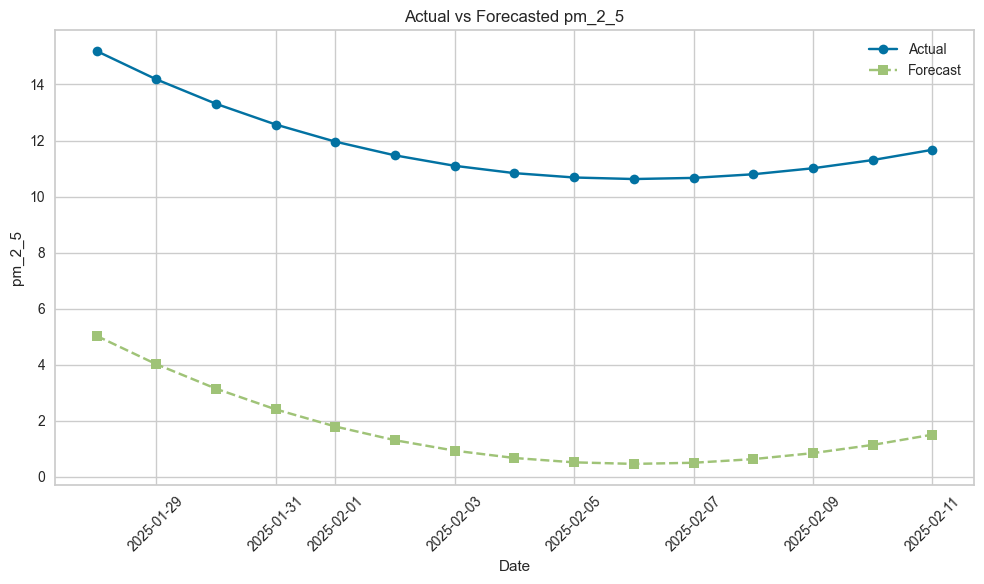

In [ ]:
# ‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç‡∏Å‡∏≤‡∏£‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á‡∏Å‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢
plt.figure(figsize=(10, 6))
plt.plot(test_df.index.to_timestamp(), test_df['pm_2_5_sp'], label='Actual', marker='o')
plt.plot(test_df.index, test_df['pm_2_5_sp_diff'], label='Forecast', marker='s', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('pm_2_5')
plt.title('Actual vs Forecasted pm_2_5')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)
import numpy as np

# ‡∏î‡∏∂‡∏á‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏≤‡∏Å test_df
actual = test_df['pm_2_5']

# ‡∏î‡∏∂‡∏á‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏à‡∏≤‡∏Å forecast
predicted = forecast['y_pred']

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì MAE
mae = mean_absolute_error(actual, predicted)

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì MSE
mse = mean_squared_error(actual, predicted)

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì RMSE
rmse = np.sqrt(mse)

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì MAPE ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏à‡∏≤‡∏Å sklearn
mape = mean_absolute_percentage_error(actual, predicted) * 100  # ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏õ‡∏≠‡∏£‡πå‡πÄ‡∏ã‡πá‡∏ô‡∏ï‡πå

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì R¬≤
r2 = r2_score(actual, predicted)

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥ (Accuracy)
mean_actual = np.mean(actual)
accuracy = 100 - mape 

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R¬≤: {r2:.4f}")
print(f"‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥ (Accuracy): {accuracy:.2f}%")

MAE: 9.6328
MSE: 145.6716
RMSE: 12.0694
MAPE: 44.59%
R¬≤: -1.7978
‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥ (Accuracy): 55.41%
